In [850]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

df = pd.concat([train_df, test_df])

df.head()

C:\Users\Me\AppData\Local\Temp\ipykernel_12388\906577544.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [851]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

**1. Data Cleaning and Preprocessing:**
So many missing values, we will need to treat each column depending on the nature of the data in each column and the overall context of your project.

In [852]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Name                       15000
Monthly_Inhand_Salary      22500
Type_of_Loan               17112
Num_of_Delayed_Payment     10500
Num_Credit_Inquiries        3000
Credit_History_Age         13500
Amount_invested_monthly     6750
Monthly_Balance             1762
Credit_Score               50000
dtype: int64

In [853]:
#<--Name-->
name_value_counts = df['Name'].value_counts()
top_names = name_value_counts.head(10)
num_unique_names = df['Name'].nunique()

df = df.copy()
df['Name'].fillna('J. Doe', inplace=True)
df['Name'].isnull().sum()

top_names, num_unique_names


(Name
 Stevex                66
 Langep                65
 Jessicad              59
 Vaughanl              58
 Raymondr              58
 Deepa Seetharamanm    58
 Jessica Wohlt         57
 Nicko                 57
 Ronald Groverk        56
 Jonesb                55
 Name: count, dtype: int64,
 10139)

In [855]:
# <--Monthly_Inhand_Salary--> cell 1
salary_distribution = df['Monthly_Inhand_Salary'].describe()
print(salary_distribution)

df['Monthly_Inhand_Salary'].isna().sum()


# <--Monthly_Inhand_Salary--> cell 2
median_salary = df['Monthly_Inhand_Salary'].median() #<--- given the distribution of the "Monthly_Inhand_Salary" column. see(Skewed Distribution, Range Values, Median value)
df['Monthly_Inhand_Salary'].fillna(median_salary, inplace=True)
salary_distribution = df['Monthly_Inhand_Salary'].describe()
salary_distribution

count    127500.000000
mean       4190.115139
std        3180.489657
min         303.645417
25%        1625.265833
50%        3091.000000
75%        5948.454596
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


22500

In [857]:
# <--Type of Loan-->
loan_type_counts = df['Type_of_Loan'].value_counts()

top_loan_types = loan_type_counts.head(10)
num_unique_loan_types = df['Type_of_Loan'].nunique()

df['Type_of_Loan'].isna().sum()


df['Type_of_Loan'].fillna('Not Specified', inplace=True)   #<--- given the distribution of the "Type_of_Loan" column. see(Not Specified, Range Values)


top_loan_types, num_unique_loan_types


(Type_of_Loan
 Not Specified                      2112
 Credit-Builder Loan                1920
 Personal Loan                      1908
 Debt Consolidation Loan            1896
 Student Loan                       1860
 Payday Loan                        1800
 Mortgage Loan                      1764
 Auto Loan                          1728
 Home Equity Loan                   1704
 Personal Loan, and Student Loan     480
 Name: count, dtype: int64,
 6260)

In [858]:
# <--Number of Delayed Payments-->
data_type_delayed_payments = df['Num_of_Delayed_Payment'].dtype

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce') #<--- numbers into numeric types
skewness_delayed_payments = df['Num_of_Delayed_Payment'].skew()
summary_delayed_payments = df['Num_of_Delayed_Payment'].describe()

data_type_delayed_payments, skewness_delayed_payments, summary_delayed_payments

# <--Number of Delayed Payments--> cell 2
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: 0 if x < 0 else x)

percentile_95 = df['Num_of_Delayed_Payment'].quantile(0.95)  #<--- reducing the impact of extreme outliers
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: percentile_95 if x > percentile_95 else x)

median_delayed_payments = df['Num_of_Delayed_Payment'].median()
df['Num_of_Delayed_Payment'].fillna(median_delayed_payments, inplace=True)

new_summary_delayed_payments = df['Num_of_Delayed_Payment'].describe()
new_summary_delayed_payments


(dtype('O'),
 14.336422664155652,
 count    135329.000000
 mean         30.937020
 std         224.723576
 min          -3.000000
 25%           9.000000
 50%          14.000000
 75%          18.000000
 max        4399.000000
 Name: Num_of_Delayed_Payment, dtype: float64)

In [860]:
# <--Number of Credit inquires --> cell 1
skewness_credit_inquiries = df['Num_Credit_Inquiries'].skew()
distribution_credit_inquiries = df['Num_Credit_Inquiries'].describe()

skewness_credit_inquiries, distribution_credit_inquiries

# <--Number of Credit inquires --> cell 2

# <- 9.72 Skewness, highly right skewed, and precense of outliers
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: 0 if x < 0 else x)
new_skewness_credit_inquiries2 = df['Num_Credit_Inquiries'].skew()

percentile_95_inquiries = df['Num_Credit_Inquiries'].quantile(0.95)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: percentile_95_inquiries if x > percentile_95_inquiries else x)

median_credit_inquiries = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median_credit_inquiries, inplace=True)

new_summary_credit_inquiries = df['Num_Credit_Inquiries'].describe()
new_summary_credit_inquiries, new_skewness_credit_inquiries2


(9.718317423718114,
 count    147000.000000
 mean         28.529014
 std         194.456058
 min           0.000000
 25%           3.000000
 50%           6.000000
 75%           9.000000
 max        2597.000000
 Name: Num_Credit_Inquiries, dtype: float64)

In [862]:
# <--Years of Credit History--> cell 1

def convert_to_total_months(age_str):
    if pd.isna(age_str):
        return None
    parts = age_str.split(' ')
    years = int(parts[0]) if parts[0].isdigit() else 0
    months = int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else 0
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_total_months)
credit_history_age_skewness = df['Credit_History_Age'].skew()
credit_history_age_distribution = df['Credit_History_Age'].describe()
credit_history_age_distribution, credit_history_age_skewness


# <--Years of Credit History--> cell 2
median_credit_history = df['Credit_History_Age'].median()
df['Credit_History_Age'].fillna(median_credit_history, inplace=True)
new_skewness_credit_history = df['Credit_History_Age'].skew()
new_summary_credit_history = df['Credit_History_Age'].describe()
new_summary_credit_history, new_skewness_credit_history

(count    136500.000000
 mean        223.215326
 std          99.719548
 min           1.000000
 25%         146.000000
 50%         222.000000
 75%         304.000000
 max         408.000000
 Name: Credit_History_Age, dtype: float64,
 -0.048023953162607956)

In [864]:
# <--Changed_Credit_Limit --> cell 1
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', 0)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
nan_count = df['Changed_Credit_Limit'].isna().sum() #<--- checking for new missing values
print(f'Number of NaNs in Changed_Credit_Limit: {nan_count}')

if nan_count > 0:
    median_value = df['Changed_Credit_Limit'].median()
    df['Changed_Credit_Limit'].fillna(median_value, inplace=True)

# <--Changed_Credit_Limit --> cell 2

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['Changed_Credit_Limit'], kde=True)
plt.title('Distribution of Changed Credit Limit')
plt.xlabel('Changed Credit Limit')
plt.ylabel('Frequency')
plt.show()

Number of NaNs in Changed_Credit_Limit: 0


In [866]:
# <-- Amount invested monthly --> cell 1
# convert  to a numeric format
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

amount_invested_distribution = df['Amount_invested_monthly'].describe()
amount_invested_skewness = df['Amount_invested_monthly'].skew()
amount_invested_distribution, amount_invested_skewness

# <-- Amount invested monthly --> cell 2
median_amount_invested = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_amount_invested, inplace=True)

new_summary_amount_invested = df['Amount_invested_monthly'].describe()
new_skewness_amount_invested = df['Amount_invested_monthly'].skew()
new_summary_amount_invested, new_skewness_amount_invested


(count    136770.000000
 mean        195.305028
 std         198.599612
 min           0.000000
 25%          72.232194
 50%         128.984784
 75%         236.844304
 max        1977.326102
 Name: Amount_invested_monthly, dtype: float64,
 2.5295788801444172)

In [868]:
# <-- Monthly balance --> cell 1
unique = df['Monthly_Balance'].nunique()
unique

# converted to a numeric format
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

monthly_balance_distribution = df['Monthly_Balance'].describe()
monthly_balance_skewness = df['Monthly_Balance'].skew()
monthly_balance_distribution, monthly_balance_skewness, unique

# <-- Monthly balance --> cell 2
median_monthly_balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median_monthly_balance, inplace=True)

new_summary_monthly_balance = df['Monthly_Balance'].describe()
new_skewness_monthly_balance = df['Monthly_Balance'].skew()
new_summary_monthly_balance, new_skewness_monthly_balance


(count    148223.000000
 mean        402.723009
 std         213.844776
 min           0.007760
 25%         270.241882
 50%         336.815865
 75%         470.477895
 max        1606.518192
 Name: Monthly_Balance, dtype: float64,
 1.5905121038295311,
 148224)

In [870]:
# <-- Credit Score -->
checktarget = df['Credit_Score'].isnull().sum()
target = df['Credit_Score'].describe()
target, checktarget

# I realized that the Credit_Score column values from test set were NaN, so I will split the data into train and test sets based on the Credit_Score column


(count       100000
 unique           3
 top       Standard
 freq         53174
 Name: Credit_Score, dtype: object,
 50000)

In [871]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
missing_values = df.isnull().sum()
missing_values[missing_values > 0] #<--- missing values are from test dataset which we merged with train dataset

In [873]:
 #<--- Number_of_Loan -->
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).replace('-100', '0').str.replace(r'\D', '', regex=True).astype(int)

median_value = df[df['Num_of_Loan'] >= 0]['Num_of_Loan'].median()
df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = median_value

outlier_threshold = df['Num_of_Loan'].quantile(0.99)
df.loc[df['Num_of_Loan'] > outlier_threshold, 'Num_of_Loan'] = outlier_threshold
df['Num_of_Loan'].describe()
df['Num_of_Loan'].isnull().sum()

0

In [874]:
#<--- Age -->
df['Age'] = df['Age'].astype(str).str.replace(r'\D', '', regex=True).astype(int)

median_age = df[df['Age'] >= 0]['Age'].median()
df.loc[df['Age'] < 0, 'Age'] = median_age

age_outlier_threshold = df['Age'].quantile(0.99)
df.loc[df['Age'] > age_outlier_threshold, 'Age'] = age_outlier_threshold
df['Num_of_Loan'].describe()
df['Num_of_Loan'].isnull().sum()

C:\Users\Me\AppData\Local\Temp\ipykernel_12388\864161557.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4058.0200000000186' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['Age'] > age_outlier_threshold, 'Age'] = age_outlier_threshold


0

In [875]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

**1. Data Preprocessing:** Moving into converting categorical data into more suitable format

In [876]:
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN']
df = df.drop(columns=columns_to_drop) #<--- dropping columns that are not needed
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [877]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_collumns_head = df.select_dtypes(include=['object', 'category']).describe()
categorical_columns_summary = {col: df[col].nunique() for col in categorical_columns}
categorical_columns_summary, categorical_collumns_head

({'Month': 12,
  'Occupation': 16,
  'Annual_Income': 21192,
  'Type_of_Loan': 6260,
  'Credit_Mix': 4,
  'Outstanding_Debt': 13622,
  'Payment_of_Min_Amount': 3,
  'Payment_Behaviour': 7,
  'Credit_Score': 3},
           Month Occupation Annual_Income   Type_of_Loan Credit_Mix  \
 count    150000     150000        150000         150000     150000   
 unique       12         16         21192           6260          4   
 top     January    _______      36585.12  Not Specified   Standard   
 freq      12500      10500            24          19224      54858   
 
        Outstanding_Debt Payment_of_Min_Amount               Payment_Behaviour  \
 count            150000                150000                          150000   
 unique            13622                     3                               7   
 top             1360.45                   Yes  Low_spent_Small_value_payments   
 freq                 36                 78484                           38207   
 
        Credit_Score

In [878]:
nominal_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_Behaviour'] #<--- nominal columns
df = pd.get_dummies(df, columns=nominal_columns)

label_encoder = LabelEncoder() #<--- ordinal columns
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] #<--- numerical columns
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')



In [879]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '').str.split(', ')

mlb = MultiLabelBinarizer()

loan_types_encoded = mlb.fit_transform(df['Type_of_Loan']) #<--- multilabel binarizer. Type_of_Loan column has multiple values per row. e.g (Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan)
loan_types_df = pd.DataFrame(loan_types_encoded, columns=mlb.classes_)

df = df.join(loan_types_df)

df.drop('Type_of_Loan', axis=1, inplace=True)

df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Small_value_payments,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,23.0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,...,False,1,1,0,1,0,0,0,1,0
0,23.0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,...,True,1,1,0,1,0,0,0,1,0
1,23.0,19114.12,3091.000000,3,4,3,4,-1,14.0,11.27,...,False,1,1,0,1,0,0,0,1,0
1,24.0,19114.12,1824.843333,3,4,3,4,3,9.0,13.27,...,False,1,1,0,1,0,0,0,1,0
2,500.0,19114.12,3091.000000,3,4,3,4,3,7.0,0.00,...,False,1,1,0,1,0,0,0,1,0


In [880]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 

In [881]:
occupation_placeholder_values = df['Occupation________'].value_counts()
credit_mix_placeholder_values = df['Credit_Mix__'].value_counts()

occupation_placeholder_values, credit_mix_placeholder_values

(Occupation________
 False    139500
 True      10500
 Name: count, dtype: int64,
 Credit_Mix__
 False    120000
 True      30000
 Name: count, dtype: int64)

df.rename(columns={'Occupation________': 'Occupation_Unknown'}, inplace=True) #<--- some values in the Occupation column are missing, so I will replace them with 'Unknown'. I still want to keep unknown values as a separate category.
df['Occupation_Unknown'].describe()

occupation_columns = [col for col in df.columns if col.startswith('Occupation_')] #<--- Here we check that when 'Occupation_Unknown' is False, at least one other occupation column is True
check_occupation = df[~df['Occupation_Unknown']].apply(lambda x: x[occupation_columns].any(), axis=1)
all_occupations_valid = check_occupation.all()  #<--- all values in the check are True

all_occupations_valid


df.rename(columns={'Credit_Mix__': 'Credit_Mix_Unknown'}, inplace=True) #<--- some values in the Occupation column are missing, so I will replace them with 'Unknown'. I still want to keep unknown values as a separate category.
df['Credit_Mix_Unknown'].describe()

credit_mix_columns = [col for col in df.columns if col.startswith('Credit_Mix')] #<--- Here we check that when 'Credit_Mix_Unknown' is False, at least one other occupation column is True
check_credit_mix = df[~df['Credit_Mix_Unknown']].apply(lambda x: x[credit_mix_columns].any(), axis=1)
all_credit_mix_valid = check_credit_mix.all()  #<--- all values in the check are True

all_credit_mix_valid


In [882]:
missing_values = df.isnull().sum() #<--- checking for missing values
missing_values[missing_values > 0]

Annual_Income       10500
Outstanding_Debt     1500
Credit_Score        50000
dtype: int64

Consider the nature of Annual_Income. If it's reasonable to assume that missing values can be imputed based on other factors (like occupation or age), you might use mean/median imputation or a more sophisticated method like regression imputation.
If missing values are randomly distributed, mean/median imputation could be a simple and effective approach.

In [883]:
 #<--- see if the same rows have missing values in both 'Num_of_Loan' and 'Outstanding_Debt'. Assuming that if a customer has no loans, they also have no outstanding debt.
missing_both = df[df['Num_of_Loan'].isnull() & df['Outstanding_Debt'].isnull()]
num_missing_both = len(missing_both)

num_missing_both

#Nope


0

#<--- see if the same rows have missing values in both 'Occupation_Unknown' and 'Annual_Income'. Assuming that if a customer has no job, they also have no income.
missing_income_unknown_occupation = df[df['Occupation_Unknown'] & df['Annual_Income'].isnull()]
num_missing_income_unknown_occupation = len(missing_income_unknown_occupation)

num_missing_income_unknown_occupation

#Nope

In [884]:
skewness = df['Annual_Income'].skew()
print("Skewness of Annual Income:", skewness) #<---  If the distribution of Annual_Income is skewed, then median is a better choice than mean


Skewness of Annual Income: 12.712928185422022


In [885]:
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True) #<--- imputing missing values with median
df['Num_of_Loan'].fillna(0, inplace=True) #<--- imputing missing values with 0
df['Outstanding_Debt'].fillna(0, inplace=True)  #<--- imputing missing values with 0


In [886]:
annual_income_descending = df.sort_values(by='Age', ascending=True) #<--- wanted to check for outliers. found out that it makes no sense
annual_income_descending['Age'].head(), annual_income_descending['Age'].describe()

(17115    14.0
 32513    14.0
 52496    14.0
 96336    14.0
 96337    14.0
 Name: Age, dtype: float64,
 count    150000.000000
 mean         95.876300
 std         456.114639
 min          14.000000
 25%          25.000000
 50%          34.000000
 75%          43.000000
 max        4058.020000
 Name: Age, dtype: float64)

In [887]:
from scipy.stats import skew

columns_to_analyze = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan', 'Delay_from_due_date']

def analyze_column(df, column):
    print(f"Analysis for {column}:")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Mode: {df[column].mode()[0]}")
    print(f"Skewness: {skew(df[column].dropna())}")
    print(f"Missing Values: {df[column].isnull().sum()}")
    print(f"Value Counts:\n{df[column].value_counts().head(10)}") #<--- top 10 values
    print("-" * 30)
for col in columns_to_analyze:
    analyze_column(df, col)

Analysis for Age:
Mean: 95.87630000000017
Median: 34.0
Mode: 39.0
Skewness: 7.986464837155972
Missing Values: 0
Value Counts:
Age
39.0    4416
32.0    4413
28.0    4383
26.0    4366
35.0    4349
38.0    4334
44.0    4324
27.0    4316
31.0    4287
22.0    4278
Name: count, dtype: int64
------------------------------
Analysis for Num_Bank_Accounts:
Mean: 17.00694
Median: 6.0
Mode: 6
Skewness: 11.218661270585757
Missing Values: 0
Value Counts:
Num_Bank_Accounts
6     19505
7     19231
8     19152
4     18286
5     18186
3     17905
9      8181
10     7846
1      6743
0      6494
Name: count, dtype: int64
------------------------------
Analysis for Num_of_Loan:
Mean: 3.42308
Median: 3.0
Mode: 3
Skewness: 0.4643533397313268
Missing Values: 0
Value Counts:
Num_of_Loan
3    22618
2    22547
0    22226
4    22111
1    15901
6    11705
7    11024
5    10814
9     6269
8     4785
Name: count, dtype: int64
------------------------------
Analysis for Delay_from_due_date:
Mean: 21.0634
Median: 18.0

In [888]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Num_Bank_Accounts'].fillna(round(df['Num_Bank_Accounts'].median()), inplace=True)
df['Num_of_Loan'].fillna(0, inplace=True)  # Mode is 0, common to have no loans
df['Delay_from_due_date'].fillna(round(df['Delay_from_due_date'].median()), inplace=True)

In [889]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

unreasonable_ages_mask = (df['Age'] < 18) | (df['Age'] > 100)
unreasonable_ages = df[unreasonable_ages_mask]

unreasonable_ages_count = unreasonable_ages.shape[0]
unreasonable_ages_count


12387

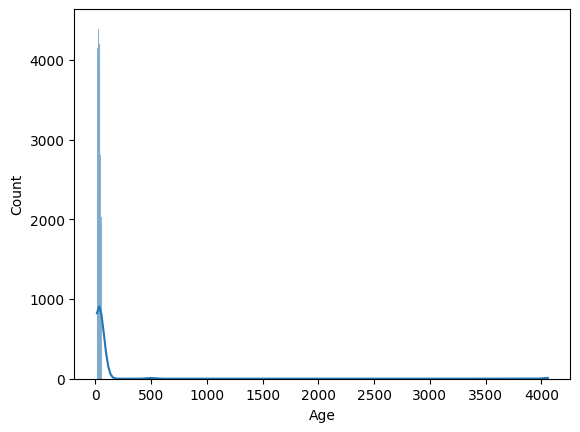

In [890]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [891]:
unreasonable_ages_mask = (df['Age'] < 18) | (df['Age'] > 100) #<--- looked like there still were legit values below 18, but we will focus on adults

reasonable_age_median = df.loc[~unreasonable_ages_mask, 'Age'].median()

df.loc[unreasonable_ages_mask, 'Age'] = reasonable_age_median

post_imputation_check = df['Age'].between(18, 100).all()
post_imputation_check


True

sns.histplot(df['Age'], kde=True) #<--- looks better
plt.show()

In [892]:
 #<--- Last check for _ in columns
underscore_present = df.apply(lambda x: x.astype(str).str.contains('_').any())
underscore_columns = underscore_present[underscore_present].index.tolist()

if underscore_columns:
    print(f"Underscores found in columns: {underscore_columns}")
else:
    print("No underscores found in the DataFrame.")

No underscores found in the DataFrame.


**2. Exploratory Data Analysis (EDA):**

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Bar Chart for Occupation
plt.figure(figsize=(12, 6))
train_df['Occupation'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

selected_columns = ['Age', 'Annual_Income', 'Credit_Utilization_Ratio', 'Num_of_Loan', 'Outstanding_Debt', 'Interest_Rate']
sns.pairplot(train_df[selected_columns])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Annual_Income'])
plt.title('Box Plot of Annual Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=train_df['Age'])
plt.title('Violin Plot of Age')
plt.show()

stacked_data = train_df.groupby(['Occupation', 'Credit_Mix']).size().unstack()

stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Credit Mix in Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

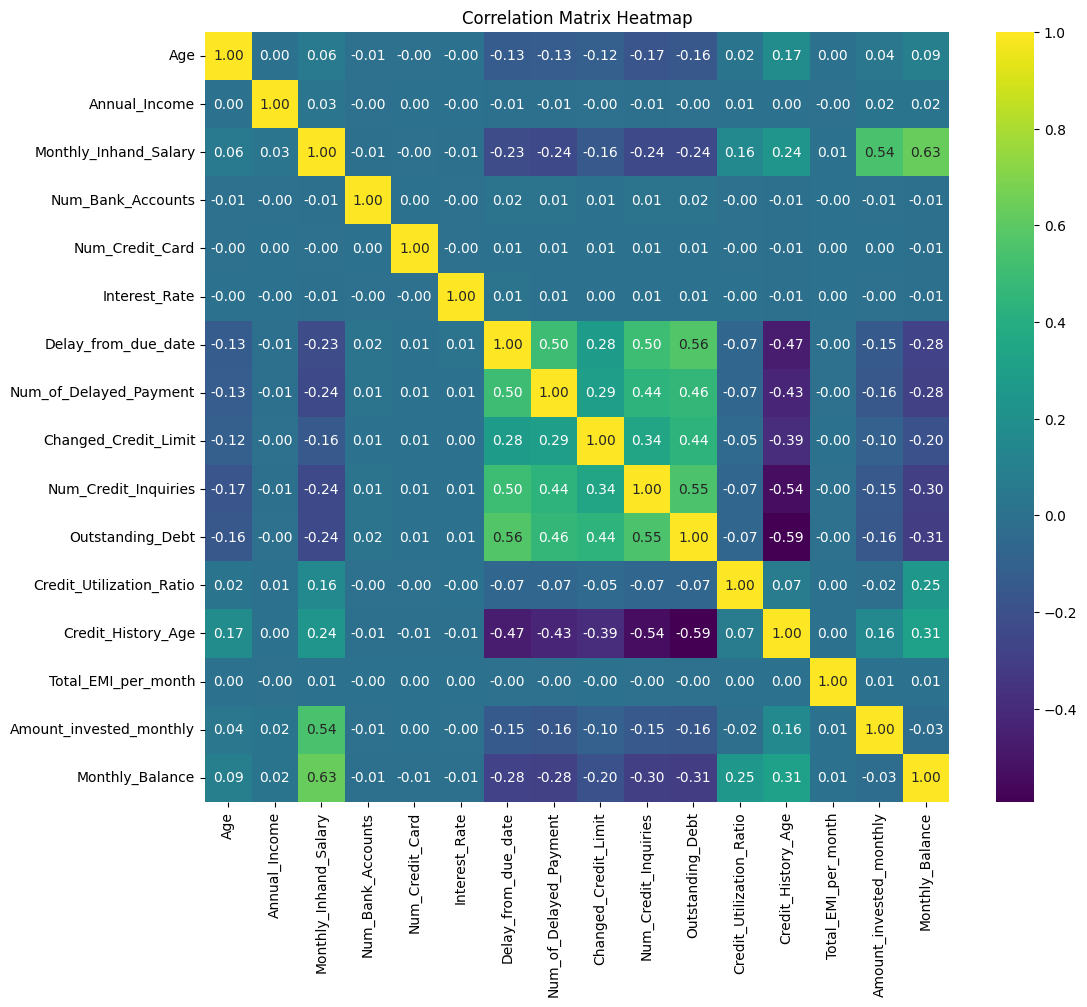

In [893]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()


**2.5 Handling Outliers**

In [894]:
from scipy import stats

data_types = df.dtypes
print("Data Types:")
print(data_types)

summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

outlier_columns = []
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):  # Check if column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(column)
            print(f"\nOutliers in {column}:")
            print(outliers)
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

infinite_values = df.isin([np.inf, -np.inf]).sum()
print("\nInfinite Values:")
print(infinite_values)


Data Types:
Age                      float64
Annual_Income            float64
Monthly_Inhand_Salary    float64
Num_Bank_Accounts          int64
Num_Credit_Card            int64
                          ...   
Mortgage Loan              int32
Not Specified              int32
Payday Loan                int32
Personal Loan              int32
Student Loan               int32
Length: 67, dtype: object

Summary Statistics:
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  150000.000000   1.500000e+05          150000.000000      150000.000000   
mean       34.509120   1.645356e+05            4025.247868          17.006940   
std         9.720988   1.360266e+06            2958.412598         117.069476   
min        18.000000   7.005930e+03             303.645417          -1.000000   
25%        27.000000   2.006286e+04            1792.520417           3.000000   
50%        34.000000   3.755178e+04            3091.000000           6.000000   
75%        

In [895]:
df['Delay_from_due_date'].isnull().sum()

0

**3. Splitting the data: reminder that original test.csv target variable was already dropped**

In [896]:
train_set = df[df['Credit_Score'].notna()] #<--- split the data into train and test sets based on the Credit_Score column
test_set = df[df['Credit_Score'].isna()]

test_set = test_set.drop(columns=['Credit_Score'], errors='ignore')

X_train = train_set.drop('Credit_Score', axis=1)  # Features for training
y_train = train_set['Credit_Score']  # Target variable for training

# For the test set
X_test = test_set


**4. Transform, Normalize or Standardize Numerical Data:**

In [897]:
X_train['Delay_from_due_date'].isnull().sum()

0

In [898]:
numerical_columns.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,34.509120,1.645356e+05,4025.247868,17.006940,22.623447,71.234907,21.063400,13.443027,10.166229,6.365160,1411.903615,32.283309,223.105947,1432.513579,189.455583,401.942229
std,9.720988,1.360266e+06,2958.412598,117.069476,129.143006,461.537193,14.860154,5.947961,6.877983,3.918386,1158.067480,5.113315,95.126991,8403.759977,190.569511,212.693891
min,18.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,-6.490000,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,27.000000,2.006286e+04,1792.520417,3.000000,4.000000,8.000000,10.000000,9.000000,4.970000,3.000000,551.750000,28.054731,156.000000,30.947775,77.018550,270.971064
50%,34.000000,3.755178e+04,3091.000000,6.000000,5.000000,13.000000,18.000000,14.000000,9.250000,6.000000,1153.890000,32.297058,222.000000,71.280006,128.984784,336.815865
75%,42.000000,7.001536e+04,5363.071667,7.000000,7.000000,20.000000,28.000000,18.000000,14.640000,9.000000,1932.490000,36.487954,294.000000,166.279555,220.228565,467.988694
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,24.000000,36.970000,14.000000,4998.070000,50.000000,408.000000,82398.000000,1977.326102,1606.518192


In [901]:
import pandas as pd
import numpy as np
from scipy.stats import skew

def identify_log_transform_columns(numerical_columns, skewness_threshold=0.75):
    # Filter out binary/categorical columns
    non_binary_cols = numerical_columns.loc[:, numerical_columns.apply(lambda x: len(x.unique()) > 2)]

    # Initialize list to hold columns eligible for transformation
    eligible_for_transformation = []

    # Calculate skewness and select highly skewed features
    for column in non_binary_cols.columns:
        if not any(numerical_columns[column] < 0):
            skewness = skew(numerical_columns[column].dropna())
            if abs(skewness) > skewness_threshold:
                eligible_for_transformation.append(column)

    return eligible_for_transformation

# Assuming numerical_columns is defined and is a DataFrame
columns_to_transform = identify_log_transform_columns(numerical_columns)

print(f"Columns transformed: {columns_to_transform}")

Columns transformed: ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [900]:
X_train['Delay_from_due_date'].isnull().sum()

0

In [902]:
from scipy.stats.mstats import winsorize

for column in columns_to_transform:
    X_train[column] = np.log1p(X_train[column])
    X_test[column] = np.log1p(X_test[column])


winsorize_columns = ['Changed_Credit_Limit'] #<--- winsorize the Changed_Credit_Limit column

for column in winsorize_columns:
    X_train[column] = winsorize(X_train[column], limits=[0.01, 0.99])
    X_test[column] = winsorize(X_test[column], limits=[0.01, 0.99])

In [903]:
X_train['Delay_from_due_date'].isnull().sum()

0

**5. Feature Engineering:**

In [904]:
def age_binning(age):
    if age < 0:
        return 'Unknown'  #<--- binning the Age column
    elif age < 30:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

X_train['Age_Binned'] = X_train['Age'].apply(age_binning)
X_test['Age_Binned'] = X_test['Age'].apply(age_binning)

age_binned = pd.get_dummies(X_train['Age_Binned'], prefix='Age')
X_train = pd.concat([X_train, age_binned], axis=1)

age_binned = pd.get_dummies(X_test['Age_Binned'], prefix='Age')
X_test = pd.concat([X_test, age_binned], axis=1)

X_train.drop('Age_Binned', axis=1, inplace=True)
X_test.drop('Age_Binned', axis=1, inplace=True)



In [905]:
X_train['Annual_Income'] = pd.to_numeric(X_train['Annual_Income'], errors='coerce')
X_train['Outstanding_Debt'] = pd.to_numeric(X_train['Outstanding_Debt'], errors='coerce')
X_train['Income_to_Debt_Ratio'] = X_train['Annual_Income'] / (X_train['Outstanding_Debt'] + 0.01)

X_test['Annual_Income'] = pd.to_numeric(X_test['Annual_Income'], errors='coerce')
X_test['Outstanding_Debt'] = pd.to_numeric(X_test['Outstanding_Debt'], errors='coerce')
X_test['Income_to_Debt_Ratio'] = X_test['Annual_Income'] / (X_test['Outstanding_Debt'] + 0.01)

In [906]:
def credit_utilization_category(ratio):
    if ratio < 30:
        return 'Low'
    elif ratio < 60:
        return 'Medium'
    else:
        return 'High'

X_train['Credit_Utilization_Ratio'] = pd.to_numeric(X_train['Credit_Utilization_Ratio'], errors='coerce')
X_train['Credit_Utilization_Category'] = X_train['Credit_Utilization_Ratio'].apply(credit_utilization_category)

X_test['Credit_Utilization_Ratio'] = pd.to_numeric(X_test['Credit_Utilization_Ratio'], errors='coerce')
X_test['Credit_Utilization_Category'] = X_test['Credit_Utilization_Ratio'].apply(credit_utilization_category)

credit_utilization_category_train = pd.get_dummies(X_train['Credit_Utilization_Category'], prefix='Credit_Utilization')
X_train = pd.concat([X_train, credit_utilization_category_train], axis=1)

credit_utilization_category_test = pd.get_dummies(X_test['Credit_Utilization_Category'], prefix='Credit_Utilization')
X_test = pd.concat([X_test, credit_utilization_category_test], axis=1)

X_train.drop('Credit_Utilization_Category', axis=1, inplace=True)
X_test.drop('Credit_Utilization_Category', axis=1, inplace=True)




In [907]:
X_train['Monthly_Salary_Missing'] = X_train['Monthly_Inhand_Salary'].isnull().astype(int)

X_test['Monthly_Salary_Missing'] = X_test['Monthly_Inhand_Salary'].isnull().astype(int)


In [908]:
X_train['Loan_to_Income_Ratio'] = X_train['Num_of_Loan'] / (X_train['Annual_Income'] + 0.01)
X_test['Loan_to_Income_Ratio'] = X_test['Num_of_Loan'] / (X_test['Annual_Income'] + 0.01)

In [909]:
X_train['Normalized_Interest_Rate'] = X_train['Interest_Rate'] / (X_train['Credit_History_Age'] + 0.01)
X_test['Normalized_Interest_Rate'] = X_test['Interest_Rate'] / (X_test['Credit_History_Age'] + 0.01)

In [910]:
X_train['Debt_to_Income_Ratio'] = X_train['Outstanding_Debt'] / (X_train['Annual_Income'] + 0.01)
X_test['Debt_to_Income_Ratio'] = X_test['Outstanding_Debt'] / (X_test['Annual_Income'] + 0.01)

In [911]:
# <---the first few rows to verify
train_head = X_train.head()
test_head = X_test.head()

(train_head, test_head)

(    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0  23.0       9.858235               7.509797                  3   
 1  23.0       9.858235               8.036573                  3   
 2  34.0       9.858235               8.036573                  3   
 3  23.0       9.858235               8.036573                  3   
 4  23.0       9.858235               7.509797                  3   
 
    Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
 0         1.609438       1.386294            4                    3   
 1         1.609438       1.386294            4                   -1   
 2         1.609438       1.386294            4                    3   
 3         1.609438       1.386294            4                    5   
 4         1.609438       1.386294            4                    6   
 
    Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Age_Middle-aged  \
 0                     7.0                 -1.48  ...            False   
 1

*6. Scaling the sets:*
**Decided to use RandomForest and LightGBM, which does not require scaling**

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
columns_for_scaling = [col for col in numeric_columns if col not in binary_columns]

print("scaling needed:", columns_for_scaling)

print(df[columns_for_scaling].mean())
print(df[columns_for_scaling].std())   #<--- mean should be close to 0 and std should be close to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[columns_for_scaling] = scaler.fit_transform(X_train[columns_for_scaling])

X_test_scaled = X_test.copy()
X_test_scaled[columns_for_scaling] = scaler.transform(X_test[columns_for_scaling])
print(X_train_scaled[columns_to_scale].mean())
print(X_train_scaled[columns_to_scale].std())   #<--- check again for training set
print(X_test_scaled[columns_to_scale].mean())
print(X_test_scaled[columns_to_scale].std())   #<--- check again for test set

In [912]:
X_train['Delay_from_due_date'].isnull().sum()

0

**7. Feature Selection: Correlation, RandomForest Importance, RFECV**

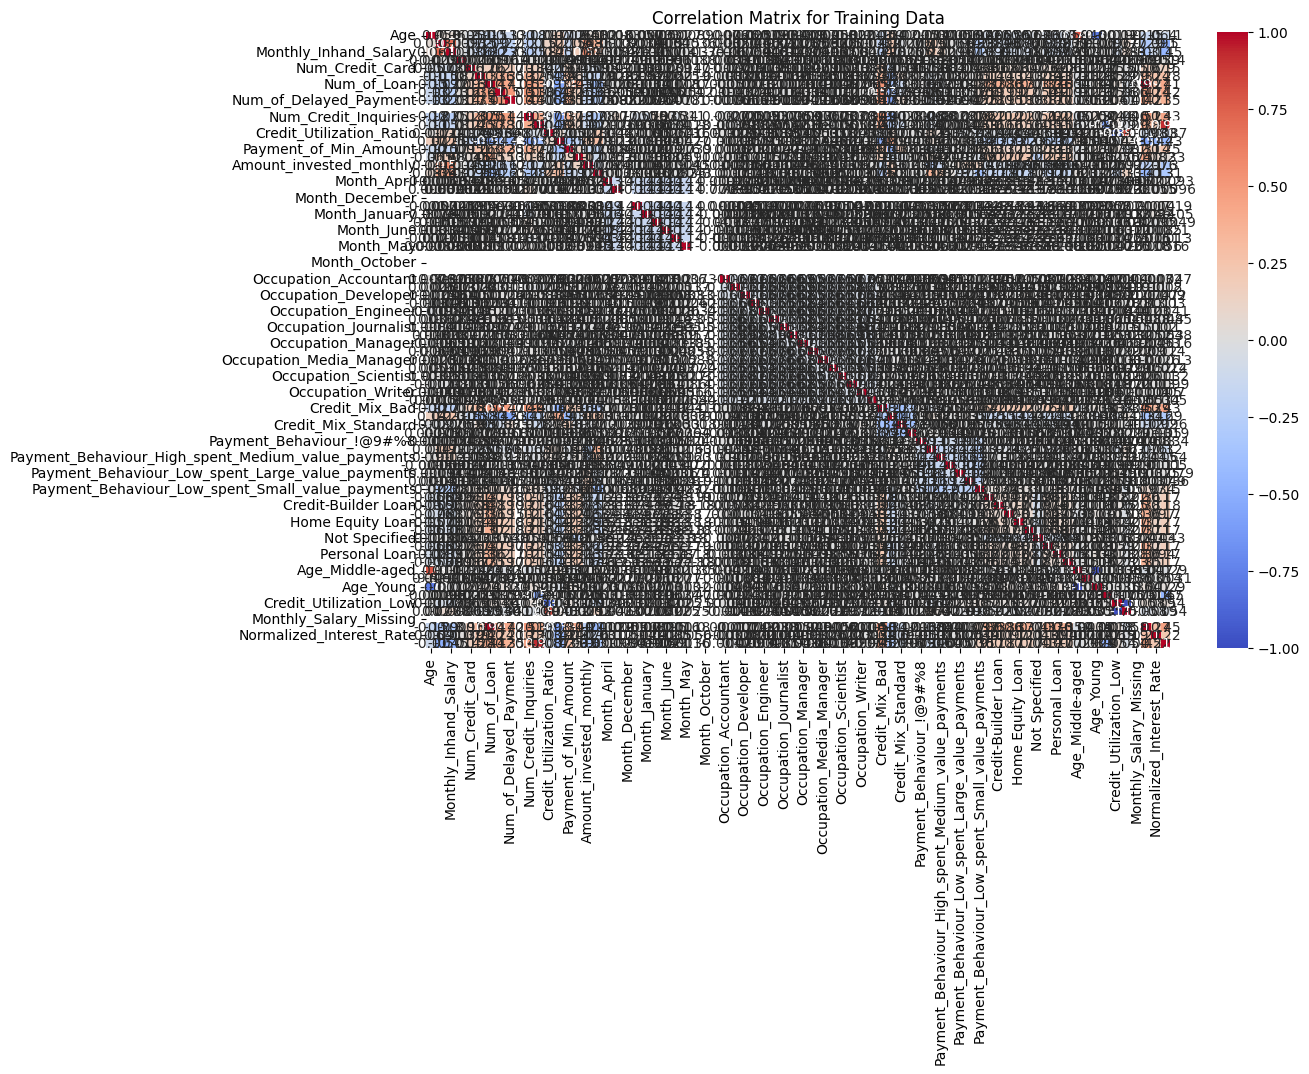

Highly correlated variables: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Month_April', 'Month_August', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer', 'Occupation________', 'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Credit_Mix__', 'Payment_Behaviour_!@9#%8', 'Payment_Be

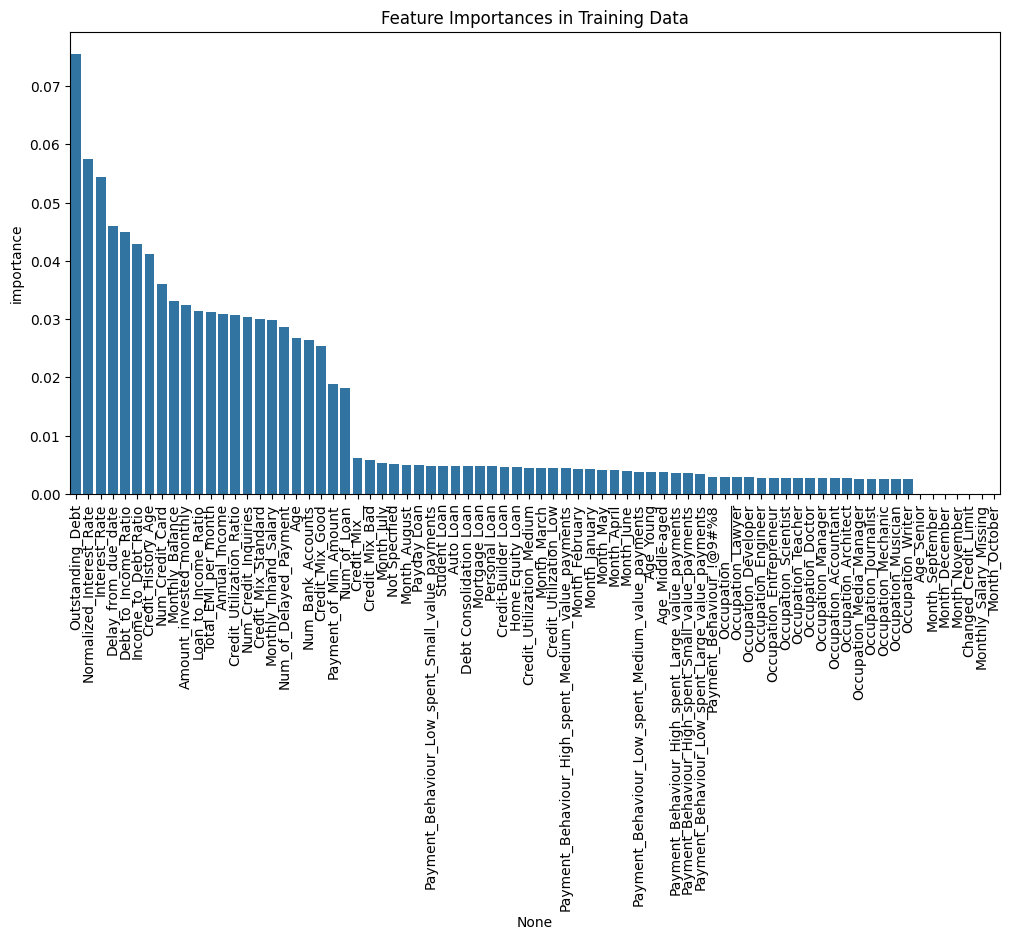

In [915]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

## 1. Correlation Analysis
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Training Data")
plt.show()

# Identify highly correlated features (e.g., above 0.85)
high_corr_var = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.85)]
print("Highly correlated variables:", high_corr_var)

## 2. Feature Importance with Random Forest
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.title("Feature Importances in Training Data")
plt.show()

## 3. Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=rf, step=5, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Final selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected Features:", selected_features)


In [ ]:
# Check for NaN values in each column of X_train
nan_counts = X_train.isna().sum()

# Display columns with NaN counts
print("NaN Counts per Column:")
print(nan_counts[nan_counts > 0])
